# Representación y visualización de datos

El aprendizaje automático trata de ajustar modelos a los datos; por esta razón, empezaremos discutiendo como los datos pueden ser representados para ser accesibles por el ordenador. Además de esto, nos basaremos en los ejemplos de matplotlib de la sección anterior para usarlos para representar datos.

## Datos en scikit-learn

Los datos en scikit-learn, salvo algunas excepciones, suelen estar almacenados en 
**arrays de 2 dimensiones**, con forma `[n_samples, n_features]`. Muchos algoritmos aceptan también matrices ``scipy.sparse`` con la misma forma.

- **n_samples:** este es el número de ejemplos. Cada ejemplo es un item a procesar (por ejemplo, clasificar). Un ejemplo puede ser un documento, una imagen, un sonido, un vídeo, un objeto astronómico, una fila de una base de datos o de un fichero CSV, o cualquier cosa que se pueda describir usando un conjunto prefijado de trazas cuantitativas.
- **n_features:** este es el número de características descriptoras que se utilizan para describir cada item de forma cuantitativa. Las características son, generalmente, valores reales, aunque pueden ser categóricas o valores discretos.

El número de características debe ser fijado de antemano. Sin embargo, puede ser extremadamente alto (por ejemplo, millones de características), siendo cero en la mayoría de casos. En este tipo de datos, es buena idea usar matrices `scipy.sparse` que manejan mucho mejor la memoria.

Como ya comentamos en la sección anterior, representamos los ejemplos (puntos o instancias) como filas en el array de datos y almacenamos las características correspondientes, las "dimensiones", como columnas.

### Un ejemplo simple: el dataset Iris

Como ejemplo de un dataset simple, vamos a echar un vistazo al conjunto iris almacenado en scikit-learn.
Los datos consisten en medidas de tres especies de flores iris distintas:

Iris Setosa
<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### Pregunta rápida:

**Asumamos que estamos interesados en categorizar nuevos ejemplos; queremos predecir si una flor nueva va a ser Iris-Setosa, Iris-Versicolor, o Iris-Virginica. Basándonos en lo discutido en secciones anteriores, ¿cómo construiríamos este dataset?**

Recuerda: necesitamos un array 2D con forma (*shape*) `[n_samples x n_features]`.
- ¿Qué sería `n_samples`?
- ¿Qué podría ser `n_features`?
Recuerda que debe haber un número **fijo** de características por cada ejemplo, y cada característica *j* debe ser el mismo tipo de cantidad para cada ejemplo.

### Cargando el dataset Iris desde scikit-learn

Para futuros experimentos con algoritmos de aprendizaje automático, te recomendamos que añadas a favoritos el [Repositorio UCI](http://archive.ics.uci.edu/ml/), que aloja muchos de los datasets que se utilizan para probar los algoritmos de aprendizaje automático. Además, algunos de estos datasets ya están incluidos en scikit-learn, pudiendo así evitar tener que descargar, leer, convertir y limpiar los ficheros de texto o CSV. El listado de datasets ya disponibles en scikit learn puede consultarse [aquí](http://scikit-learn.org/stable/datasets/#toy-datasets).

Por ejemplo, scikit-learn contiene el dataset iris. Los datos consisten en:
- Características:
  1. Longitud de sépalo en cm
  2. Ancho de sépalo en cm
  3. Longitud de pétalo en cm
  4. Ancho de sépalo en cm
- Etiquetas a predecir:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` incluye una copia del archivo CSV de iris junto con una función que lo lee a arrays de numpy:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

El dataset es un objeto ``Bunch``. Puedes ver que contiene utilizando el método ``keys()``:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Las características de cada flor se encuentra en el atributo ``data`` del dataset:

In [3]:
n_samples, n_features = iris.data.shape
print('Número de ejemplos:', n_samples)
print('Número de características:', n_features)
# sepal length, sepal width, petal length y petal width del primer ejemplo (primera flor)
print(iris.data[0])

Número de ejemplos: 150
Número de características: 4
[ 5.1  3.5  1.4  0.2]


La información sobre la clase de cada ejemplo se encuentra en el atributo ``target`` del dataset:

In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

La función de numpy llamada `bincount` (arriba) nos permite ver que las clases se distribuyen de forma uniforme en este conjunto de datos (50 flores de cada especie), donde:
- clase 0: Iris-Setosa
- clase 1: Iris-Versicolor
- clase 2: Iris-Virginica

Los nombres de las clases se almacenan en ``target_names``:

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Estos datos tienen cuatro dimensiones, pero podemos visualizar una o dos de las dimensiones usando un histograma o un scatter. Primero, activamos el *matplotlib inline mode*:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

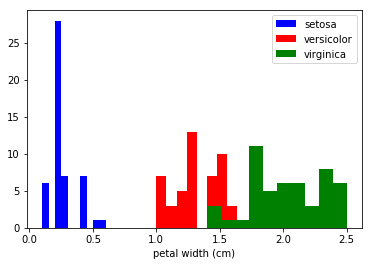

In [10]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

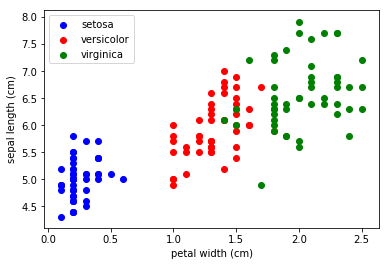

In [11]:
x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
      <li>
      **Cambia** `x_index` **e** `y_index` ** en el script anterior y encuentra una combinación de los dos parámetros que separe de la mejor forma posible las tres clases.**
      </li>
      <li>
      Este ejercicio es un adelanto a lo que se denomina **reducción de dimensionalidad**, que veremos después.
      </li>
    </ul>
</div>

### Matrices scatterplot

En lugar de realizar los plots por separado, una herramienta común que utilizan los analistas son las **matrices scatterplot**.

Estas matrices muestran los scatter plots entre todas las características del dataset, así como los histogramas para ver la distribución de cada característica.

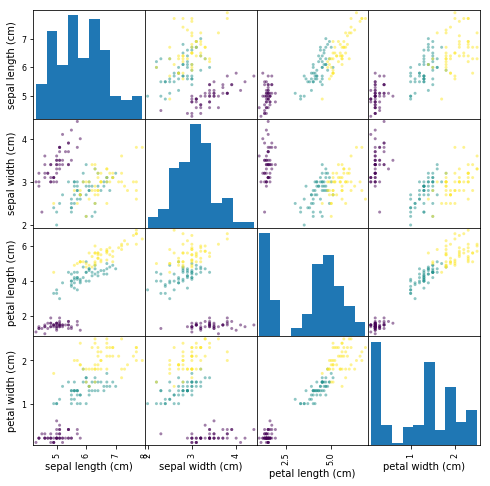

In [12]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));

## Otros datasets disponibles

[Scikit-learn pone a disposición de la comunidad una gran cantidad de datasets](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities). Vienen en tres modos:
- **Packaged Data:** pequeños datasets ya disponibles en la distribución de scikit-learn, a los que se puede acceder mediante ``sklearn.datasets.load_*``
- **Downloadable Data:** estos datasets son más grandes y pueden descargarse mediante herramientas que scikit-learn
  ya incluye.  Estas herramientas están en ``sklearn.datasets.fetch_*``
- **Generated Data:** estos datasets se generan mediante modelos basados en semillas aleatorias (datasets sintéticos). Están disponibles en ``sklearn.datasets.make_*``

Puedes explorar las herramientas de datasets de scikit-learn usando la funcionalidad de autocompletado que tiene IPython. Tras importar el paquete ``datasets`` de ``sklearn``, teclea

    datasets.load_<TAB>

o

    datasets.fetch_<TAB>

o

    datasets.make_<TAB>

para ver una lista de las funciones disponibles

In [15]:
from sklearn import datasets

Advertencia: muchos de estos datasets son bastante grandes y puede llevar bastante tiempo descargarlos.

Si comienzas una descarga con un libro de IPython y luego quieres detenerla, puedes utilizar la opción "kernel interrupt" accesible por el menú o con ``Ctrl-m i``.

Puedes presionar ``Ctrl-m h`` para una lista de todos los atajos ``ipython``.

## Cargando los datos de dígitos

Ahora vamos a ver otro dataset, donde podemos estudiar mejor como representar los datos. Podemos explorar los datos de la siguiente forma:

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [19]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [21]:
print(digits.data[0])
print(digits.data[-1])
print(digits.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[  0.   0.  10.  14.   8.   1.   0.   0.   0.   2.  16.  14.   6.   1.   0.
   0.   0.   0.  15.  15.   8.  15.   0.   0.   0.   0.   5.  16.  16.  10.
   0.   0.   0.   0.  12.  15.  15.  12.   0.   0.   0.   4.  16.   6.   4.
  16.   6.   0.   0.   8.  16.  10.   8.  16.   8.   0.   0.   1.   8.  12.
  14.  12.   1.   0.]
[0 1 2 ..., 8 9 8]


Aquí la etiqueta es directamente el dígito que representa cada ejemplo. Los datos consisten en un array de longitud 64... pero, ¿qué significan estos datos?

Una pista viene dada por el hecho de que tenemos dos versiones de los datos:
``data`` y ``images``. Vamos a echar un vistazo a ambas:

In [22]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Podemos ver que son lo mismo, mediante un simple *reshaping*:

In [23]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Vamos a visualizar los datos. Es un poco más complejo que el scatter plot que hicimos anteriormente.

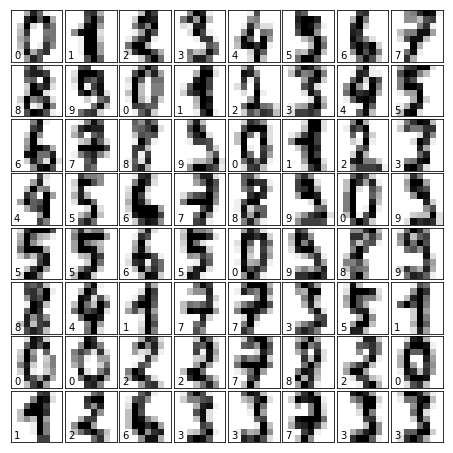

In [24]:
# Configurar la figura
fig = plt.figure(figsize=(6, 6))  # tamaño en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostrar algunos dígitos: cada imagen es de 8x8
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiquetar la imagen con el valor objetivo
    ax.text(0, 7, str(digits.target[i]))

Ahora podemos saber que significan las características. Cada característica es una cantidad real que representa la oscuridad de un píxel en una imagen 8x8 de un dígito manuscrito.

Aunque cada ejemplo tiene datos que son inherentemente de dos dimensiones, la matriz de datos incluye estos datos 2D en un **solo vector**, contenido en cada **fila** de la misma.

<div class="alert alert-success">
    <b>Ejercicio: trabajando con un dataset de reconocimiento facial</b>:
     <ul>
      <li>
      Vamos a pararnos a explorar el dataset de reconocimiento facial de Olivetti.
Descarga los datos (sobre 1.4MB), y visualiza las caras.
Puedes copiar el código utilizado para visualizar los dígitos, modificándolo convenientemente.
      </li>
    </ul>
</div>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
# descarga el dataset faces


In [ ]:
# Utiliza el script anterior para representar las caras
# Pista: plt.cm.bone es un buen colormap para este dataset
